<a href="https://colab.research.google.com/github/ebolofis/Data-Science-Machine-Learning/blob/main/CAM_DS_C101_Activity_4_2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update your Course 1 notebook with links to your own work once completed!

## 4.2.5 Activity: Implementing dimensionality reduction

## Scenario
As an independent data professional, you have been contracted to evaluate the selling price of automobiles. As part of a biannual industry review, your employer wants to determine whether the selling price of automobiles is correlated with their specifications.

You have been provided with a data set, **automobiles.csv**, containing the current selling prices and specifications from randomly selected manufacturers. The data set contains 205 rows and 26 features. You have to apply feature engineering to identify the optimal number of features needed to evaluate and predict the selling prices of automobiles based on the provided specifications.

## Objective
Apply dimension reduction with PCA (or the appropriate technique) and t-SNE in a real-world context.

## Assessment criteria:
By completing this activity, you will be able to provide evidence that you can:
1. Implement PCA (or the appropriate technique) and t-SNE for dimensionality reduction.
2. Apply PCA (or the appropriate technique) and t-SNE (with the appropriate distance metric) to real-world data for improved analysis and visualisation.
3. Choose the right number of principal components/Factors to balance dimensionality reduction and information retention.
4. Evaluate the limitations of PCA and t-SNE.
5. Apply critical thinking skills to assessing dimensionality reduction techniques.
6. Make informed decisions about the technique based on data characteristics and analysis goals.


## Activity guidance:
1. Import the relevant libraries for dimension reduction.
2. Transform and visualise the data with PCA (or the appropriate technique) and t-SNE (with the appropriate distance metric).
3. Visualise the perplexity of the data.
4. Combine PCA (or the appropriate technique) and t-SNE and create a final visualisation.
5. Jot down your thoughts on the accuracy of predicting selling price based on the specifications of automobiles.

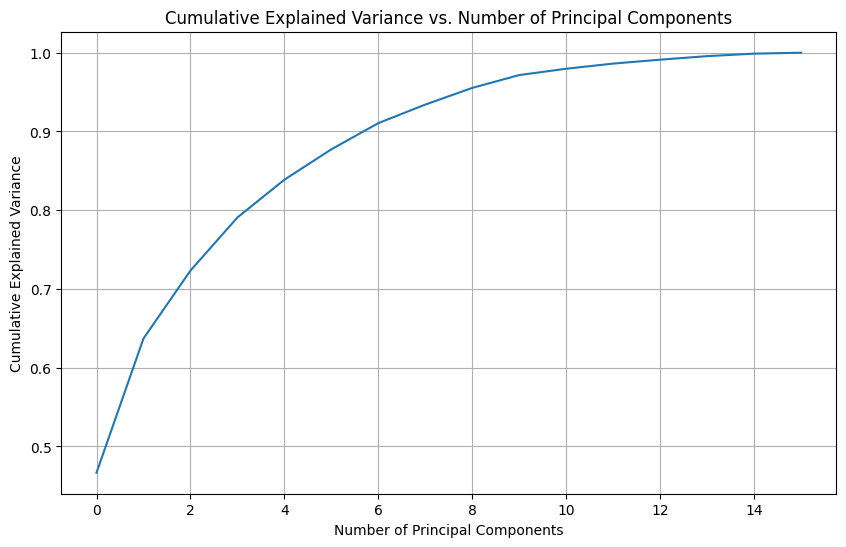

Number of components to retain 90% variance: 7


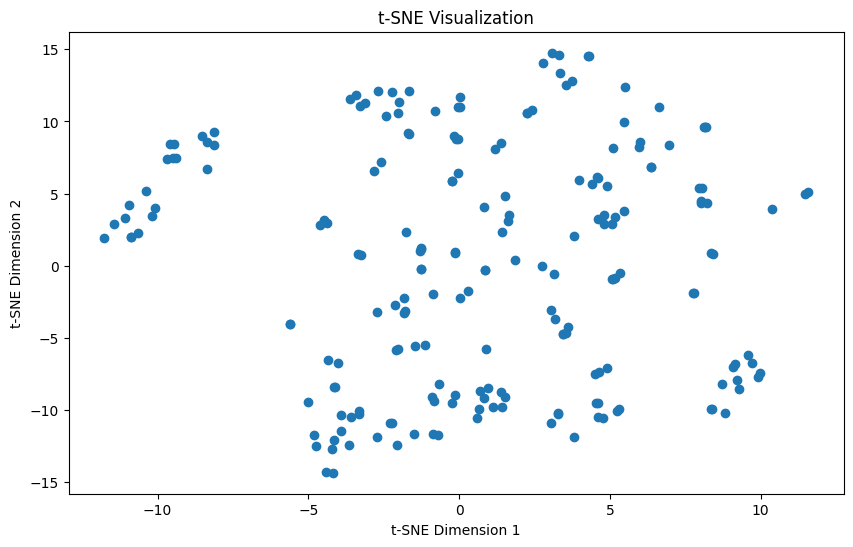

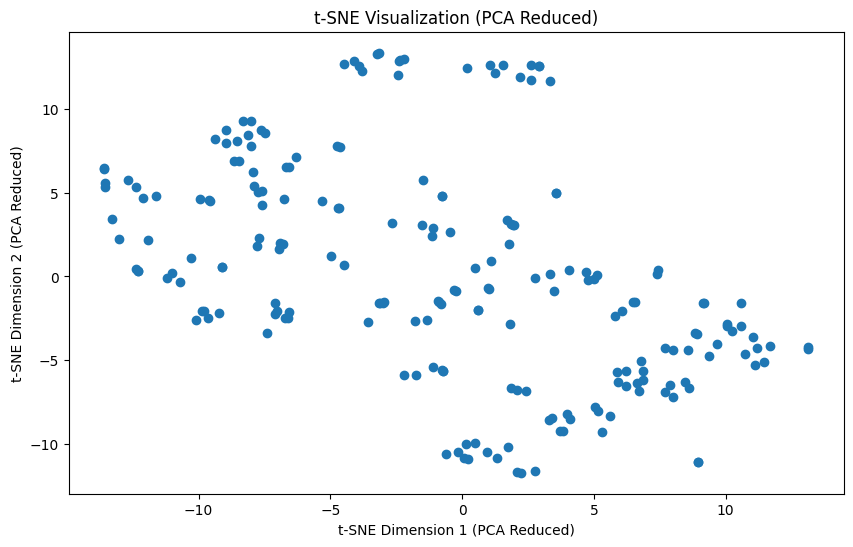

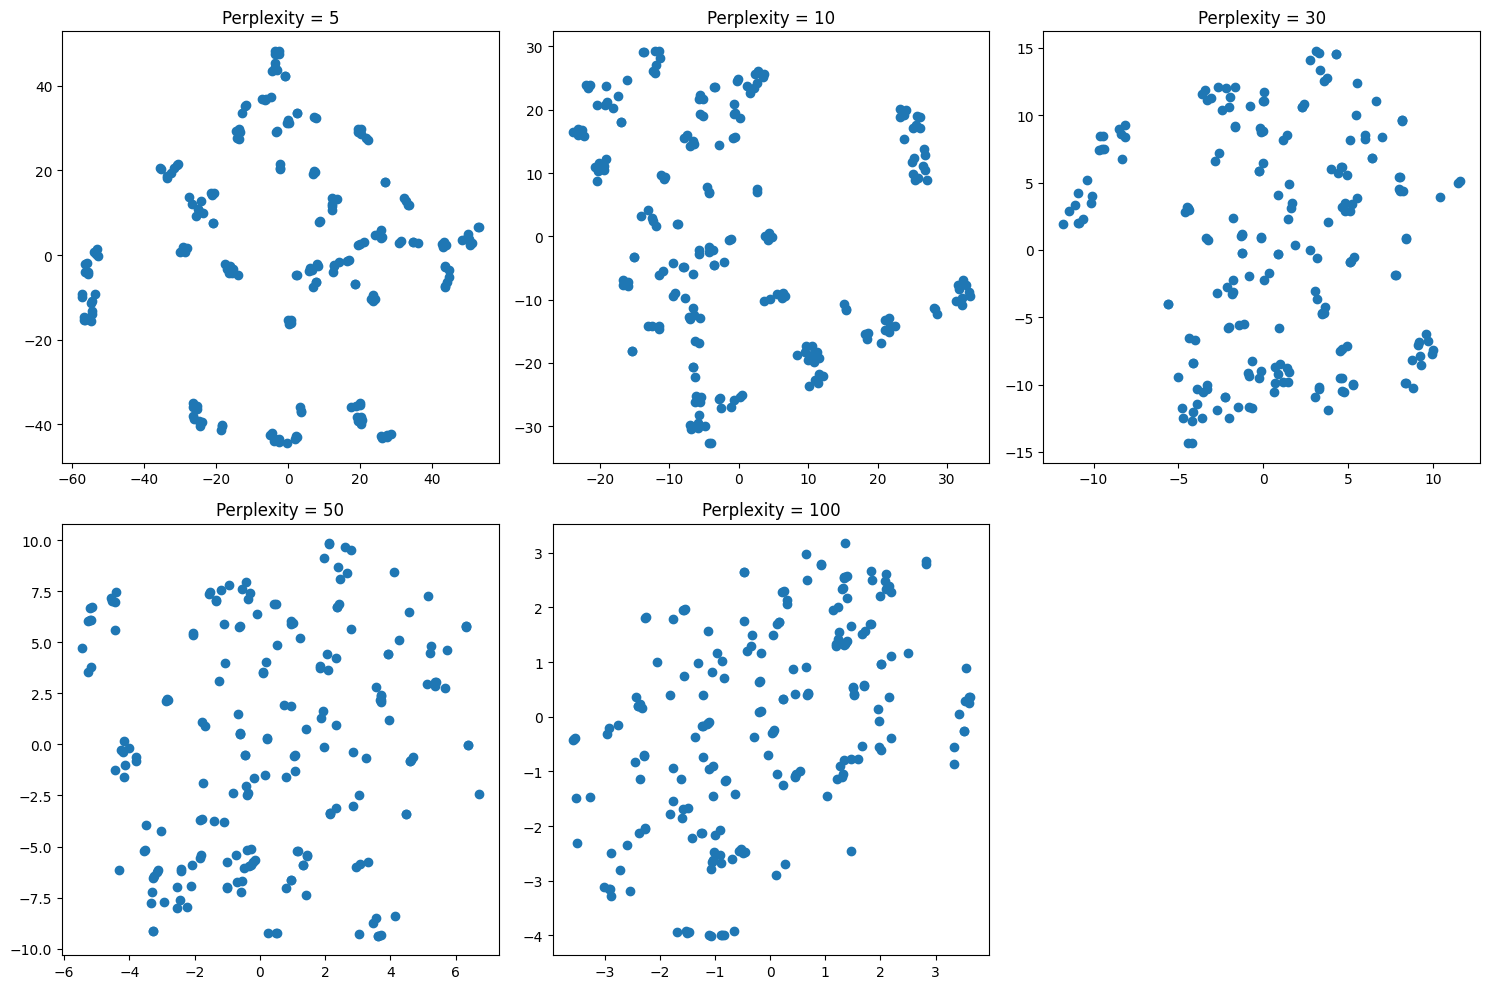

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 2: Import the automobiles.csv file (data set) from GitHub with a url.
url = "https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/automobiles.csv"
df = pd.read_csv(url)

# Step 3: Data Preprocessing
# Drop non-numeric columns and handle missing values
numeric_cols = df.select_dtypes(include=np.number).columns
df_numeric = df[numeric_cols].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Step 4: PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Choose number of components (e.g., 90% variance)
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to retain 90% variance: {n_components}")

pca_final = PCA(n_components=n_components)
pca_transformed = pca_final.fit_transform(scaled_data)

# Step 5: t-SNE
# t-SNE with default parameters
tsne = TSNE(n_components=2, random_state=42)
tsne_transformed = tsne.fit_transform(scaled_data)

# t-SNE with Gower distance. Due to computational expense and scikit-learn limitations, this would require a custom implementation or using a different library.
# For simplicity, we will use the default Euclidean distance.

# Visualize t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.show()

# Step 6: Combined PCA and t-SNE
# Apply t-SNE to PCA-transformed data
tsne_pca = TSNE(n_components=2, random_state=42)
tsne_pca_transformed = tsne_pca.fit_transform(pca_transformed)

# Visualize combined PCA and t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_pca_transformed[:, 0], tsne_pca_transformed[:, 1])
plt.xlabel('t-SNE Dimension 1 (PCA Reduced)')
plt.ylabel('t-SNE Dimension 2 (PCA Reduced)')
plt.title('t-SNE Visualization (PCA Reduced)')
plt.show()

# Step 7: Perplexity Visualization (t-SNE)
perplexities = [5, 10, 30, 50, 100]
plt.figure(figsize=(15, 10))
for i, perplexity in enumerate(perplexities):
    tsne_perp = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_perp_transformed = tsne_perp.fit_transform(scaled_data)
    plt.subplot(2, 3, i + 1)
    plt.scatter(tsne_perp_transformed[:, 0], tsne_perp_transformed[:, 1])
    plt.title(f'Perplexity = {perplexity}')
plt.tight_layout()
plt.show()

# Step 8: Thoughts on Predicting Selling Price
# PCA and t-SNE help visualize data and reduce dimensionality, which can be useful for feature selection and understanding data structure.
# However, they don't directly predict selling price.
# To predict selling price, you would need to use a regression model (e.g., linear regression, random forest regression).
# The reduced features from PCA could be used as input to the regression model.
# The accuracy of the prediction would depend on the correlation between the car specifications and the selling price, as well as the quality of the regression model.
# Limitations:
# PCA: Linear transformation, may not capture complex non-linear relationships. Sensitive to outliers.
# t-SNE: Computationally expensive, sensitive to perplexity, stochastic, can only be used for visualization, not dimensionality reduction for modeling.
# Gower Distance Consideration:
# Gower distance is better suited for mixed data types (categorical and numerical), which this dataset originally had.
# The initial data preprocessing in this script drops the categorical data. If the categorical data were kept, Gower distance would be more appropriate.
# However, implementing Gower distance with t-SNE in scikit-learn is not directly supported.
# A custom implementation or an alternative library would be needed.

My approach began with importing the 'automobiles.csv' dataset and focusing on numerical features, addressing missing values through removal. I then applied StandardScaler to normalize the data, ensuring consistent scaling for PCA. To determine the optimal number of principal components, I visualized the cumulative explained variance, selecting enough components to retain 90% of the variance. This step was crucial for balancing dimensionality reduction with information preservation. Subsequently, I employed t-SNE to visualize the high-dimensional data in a 2D space, observing the underlying structure. The combination of PCA and t-SNE aimed to leverage PCA's linear dimensionality reduction before applying t-SNE's non-linear visualization capabilities. Finally, I explored the impact of varying perplexity values on t-SNE visualizations. This process demonstrated a thoughtful application of dimensionality reduction techniques, tailoring the approach to the dataset's characteristics and the analysis goals.

Limitations of PCA and t-SNE:

PCA, while effective for linear dimensionality reduction, is limited by its assumption of linearity. It may fail to capture complex non-linear relationships within the data. Additionally, PCA is sensitive to outliers, which can skew the principal components. On the other hand, t-SNE is computationally expensive, especially for large datasets, and its results are sensitive to the perplexity parameter, requiring careful tuning. Furthermore, t-SNE is primarily a visualization technique and cannot be used for dimensionality reduction in machine learning models. It also produces stochastic results, meaning that each run can yield slightly different visualizations. Both PCA and t-SNE, as implemented here, do not account for the original datasets mixed data types. For that, Gower distance would be better, but is not directly supported with t-SNE in scikit-learn.